In [2]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('belle2')

# load dataset

In [3]:
iris = datasets.load_iris()

In [8]:
iris['data'][0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
iris['target'][0:5]

array([0, 0, 0, 0, 0])

In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# plotting basic features

In [11]:
import seaborn as sns

In [12]:
df = pd.DataFrame(np.hstack((iris['data'],iris['target'].reshape(150,1))),columns=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)','target'])

In [13]:
df.loc[:,'target_name'] = df.apply(lambda Z: 'setosa' if Z['target'] == 0 else ('versicolor' if Z['target'] == 1 else 'virginica'),axis=1)

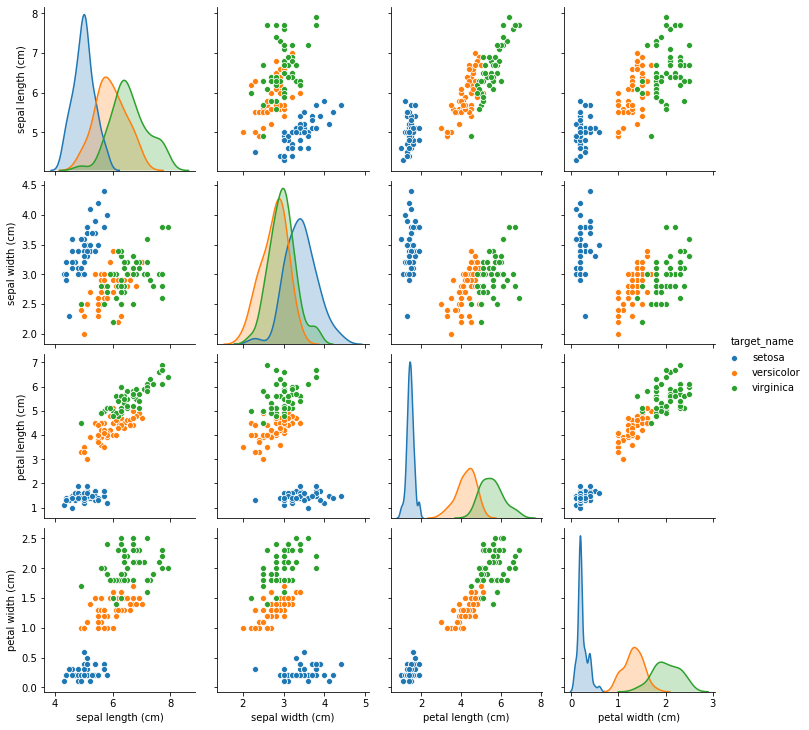

In [14]:
sns.pairplot(data=df[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',"target_name"]], hue="target_name")

# train and test dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test  = train_test_split(iris['data'],iris['target'], test_size = 0.2,random_state=20)

In [17]:
#X_train#, X_test, y_train, y_test

# sklearn training

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

# sklearn prediction

In [27]:
from sklearn import metrics
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))


The accuracy of the Decision Tree is 0.920


In [28]:
prediction=mod_dt.predict(X_train)
print('The training data score is ',"{:.3f}".format(metrics.accuracy_score(prediction,y_train)))

The training data score is  1.000


# Accuracy versus smoothness

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
X_train, X_test, y_train, y_test  =\
    train_test_split(iris['data'],iris['target'], test_size = 0.5,random_state=20)

score1 = []
score2 = []
for neighbour in range(1,20,1):
    mod_dt = KNeighborsClassifier(n_neighbors=neighbour)
    mod_dt.fit(X_train,y_train)

    prediction=mod_dt.predict(X_test)
    score_test = metrics.accuracy_score(prediction,y_test)
    #print('The accuracy of the Decision Tree is',"{:.3f}".format(score_test))

    prediction=mod_dt.predict(X_train)
    score_train = metrics.accuracy_score(prediction,y_train)
    #print('The training data score is ',"{:.3f} \n".format(score_train))
    
    score1.append(score_train)
    score2.append(score_test)
    

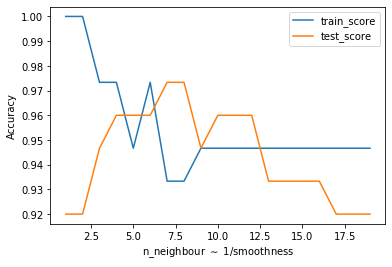

In [30]:
plt.plot(np.array([i for i in range(1,20,1)]),np.array(score1), label='train_score')
plt.plot(np.array([i for i in range(1,20,1)]),np.array(score2),label='test_score')
plt.xlabel('n_neighbour $\sim$ 1/smoothness')
plt.ylabel('Accuracy')

plt.legend()

# CrossValidation to find best  parmeter

Useful link for crossvalidation 

In [31]:
from sklearn.model_selection import KFold

In [32]:
score1 = []
score2 = []
kf = KFold(n_splits=5,shuffle=True)
for train_index, test_index in kf.split(range(150)):
    X_train = np.take(iris['data'],train_index,axis=0)
    X_test = np.take(iris['data'],test_index,axis=0)
    y_train = np.take(iris['target'],train_index,axis=0)
    y_test = np.take(iris['target'],test_index,axis=0)
    
    mod_dt = KNeighborsClassifier(n_neighbors=2)
    mod_dt.fit(X_train,y_train)

    prediction=mod_dt.predict(X_test)
    score_test = metrics.accuracy_score(prediction,y_test)
    #print('The accuracy of the Decision Tree is',"{:.3f}".format(score_test))

    prediction=mod_dt.predict(X_train)
    score_train = metrics.accuracy_score(prediction,y_train)
    #print('The training data score is ',"{:.3f} \n".format(score_train))
    
    score1.append(score_train)
    score2.append(score_test)


In [33]:
score1

[0.975, 0.9666666666666667, 0.975, 0.9833333333333333, 0.9916666666666667]

In [34]:
score2

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.8666666666666667]